In [42]:
import pandas as pd
import numpy as np

In [36]:
%matplotlib inline

In [1]:
s = "http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii"

In [10]:
help(pd.read_fwf)

Help on function read_fwf in module pandas.io.parsers:

read_fwf(filepath_or_buffer, colspecs='infer', widths=None, **kwds)
    Read a table of fixed-width formatted lines into DataFrame
    
    Also supports optionally iterating or breaking of the file
    into chunks.
    
    Additional help can be found in the `online docs for IO Tools
    <http://pandas.pydata.org/pandas-docs/stable/io.html>`_.
    
    Parameters
    ----------
    filepath_or_buffer : str, pathlib.Path, py._path.local.LocalPath or any object with a read() method (such as a file handle or StringIO)
        The string could be a URL. Valid URL schemes include http, ftp, s3, and
        file. For file URLs, a host is expected. For instance, a local file could
        be file ://localhost/path/to/table.csv
    colspecs : list of pairs (int, int) or 'infer'. optional
        A list of pairs (tuples) giving the extents of the fixed-width
        fields of each line as half-open intervals (i.e.,  [from, to[ ).
       

## 헤더 없이 파일을 읽기

In [13]:
df = pd.read_fwf(s,header=None)

In [14]:
df.head()

,0,1,2
0,1950,1,-0.060310
1,1950,2,0.626810
2,1950,3,-0.008128
3,1950,4,0.555100
4,1950,5,0.071577


In [25]:
df.tail()

,0,1,2
809,2017,6,0.40166
810,2017,7,0.63423
811,2017,8,0.15004
812,2017,9,-0.49245
813,2017,10,0.69034


In [19]:
df.shape

(814, 3)

## 월말 기준으로 날짜에 대한 범위를 구하기

In [28]:
dates = pd.date_range('1950-01', '2017-11', freq='M')

In [29]:
dates

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31'],
              dtype='datetime64[ns]', length=814, freq='M')

In [30]:
df[2].shape

(814,)

## 인덱스에 반영하기

In [33]:
df.index = dates

In [34]:
df.head()

,0,1,2
1950-01-31,1950,1,-0.060310
1950-02-28,1950,2,0.626810
1950-03-31,1950,3,-0.008128
1950-04-30,1950,4,0.555100
1950-05-31,1950,5,0.071577


## plot 그래프 그리기

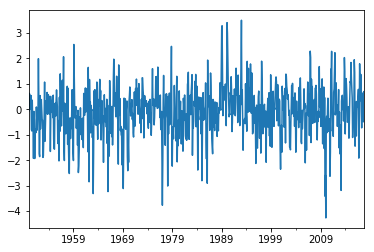

In [39]:
df[2].plot()

In [40]:
df[2]

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008128
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-07-31   -0.802480
1950-08-31   -0.851010
1950-09-30    0.357970
1950-10-31   -0.378900
1950-11-30   -0.515110
1950-12-31   -1.928100
1951-01-31   -0.084969
1951-02-28   -0.399930
1951-03-31   -1.934100
1951-04-30   -0.776480
1951-05-31   -0.862780
1951-06-30   -0.917860
1951-07-31    0.090023
1951-08-31   -0.377410
1951-09-30   -0.817780
1951-10-31   -0.212910
1951-11-30   -0.068519
1951-12-31    1.987200
1952-01-31    0.368250
1952-02-29   -1.747200
1952-03-31   -1.859500
1952-04-30    0.538520
1952-05-31   -0.773510
1952-06-30   -0.440930
                ...   
2015-05-31    0.762760
2015-06-30    0.427040
2015-07-31   -1.107900
2015-08-31   -0.689020
2015-09-30   -0.164510
2015-10-31   -0.250060
2015-11-30    1.945000
2015-12-31    1.444100
2016-01-31   -1.448700
2016-02-29   -0.023521
2016-03-31    0.280240
2016-04-30   -1.051100
2016-05-31 

## 특정 함수를 넣어서 처리하기

In [43]:
df[2].resample("A", how=['mean', np.min, np.max])

/Users/dahlmoon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


,mean,amin,amax
1950-12-31,-0.199501,-1.92810,0.626810
1951-12-31,-0.364626,-1.93410,1.987200
1952-12-31,-0.674990,-1.89090,0.538520
1953-12-31,-0.016515,-1.25580,1.068300
1954-12-31,-0.000770,-1.65610,0.552590
1955-12-31,-0.361816,-1.56810,0.760120
1956-12-31,-0.162823,-2.02860,1.391100
1957-12-31,-0.342180,-2.01260,2.062100
1958-12-31,-0.867629,-2.52180,0.770090
1959-12-31,-0.076192,-2.01280,2.544500


In [47]:
df[2].apply(['mean', np.min, np.max])

mean   -0.111329
amin   -4.265700
amax    3.495300
Name: 2, dtype: float64

In [51]:
pd.isnull(df[2])

1950-01-31    False
1950-02-28    False
1950-03-31    False
1950-04-30    False
1950-05-31    False
1950-06-30    False
1950-07-31    False
1950-08-31    False
1950-09-30    False
1950-10-31    False
1950-11-30    False
1950-12-31    False
1951-01-31    False
1951-02-28    False
1951-03-31    False
1951-04-30    False
1951-05-31    False
1951-06-30    False
1951-07-31    False
1951-08-31    False
1951-09-30    False
1951-10-31    False
1951-11-30    False
1951-12-31    False
1952-01-31    False
1952-02-29    False
1952-03-31    False
1952-04-30    False
1952-05-31    False
1952-06-30    False
              ...  
2015-05-31    False
2015-06-30    False
2015-07-31    False
2015-08-31    False
2015-09-30    False
2015-10-31    False
2015-11-30    False
2015-12-31    False
2016-01-31    False
2016-02-29    False
2016-03-31    False
2016-04-30    False
2016-05-31    False
2016-06-30    False
2016-07-31    False
2016-08-31    False
2016-09-30    False
2016-10-31    False
2016-11-30    False


## rolling 메소드 처리하기

In [54]:
help(pd.Series.rolling)

Help on function rolling in module pandas.core.generic:

rolling(self, window, min_periods=None, freq=None, center=False, win_type=None, on=None, axis=0, closed=None)
    Provides rolling window calculcations.
    
    .. versionadded:: 0.18.0
    
    Parameters
    ----------
    window : int, or offset
        Size of the moving window. This is the number of observations used for
        calculating the statistic. Each window will be a fixed size.
    
        If its an offset then this will be the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes. This is
        new in 0.19.0
    min_periods : int, default None
        Minimum number of observations in window required to have a value
        (otherwise result is NA). For a window that is specified by an offset,
        this will default to 1.
    freq : string or DateOffset object, optional (default Non

In [55]:
df[2].rolling(window=1).mean()

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-07-31   -0.802480
1950-08-31   -0.851010
1950-09-30    0.357970
1950-10-31   -0.378900
1950-11-30   -0.515110
1950-12-31   -1.928100
1951-01-31   -0.084969
1951-02-28   -0.399930
1951-03-31   -1.934100
1951-04-30   -0.776480
1951-05-31   -0.862780
1951-06-30   -0.917860
1951-07-31    0.090023
1951-08-31   -0.377410
1951-09-30   -0.817780
1951-10-31   -0.212910
1951-11-30   -0.068519
1951-12-31    1.987200
1952-01-31    0.368250
1952-02-29   -1.747200
1952-03-31   -1.859500
1952-04-30    0.538520
1952-05-31   -0.773510
1952-06-30   -0.440930
                ...   
2015-05-31    0.762760
2015-06-30    0.427040
2015-07-31   -1.107900
2015-08-31   -0.689020
2015-09-30   -0.164510
2015-10-31   -0.250060
2015-11-30    1.945000
2015-12-31    1.444100
2016-01-31   -1.448700
2016-02-29   -0.023521
2016-03-31    0.280240
2016-04-30   -1.051100
2016-05-31 

In [56]:
pd.rolling_mean(df[2],window=1)

/Users/dahlmoon/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
  """Entry point for launching an IPython kernel.


1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-07-31   -0.802480
1950-08-31   -0.851010
1950-09-30    0.357970
1950-10-31   -0.378900
1950-11-30   -0.515110
1950-12-31   -1.928100
1951-01-31   -0.084969
1951-02-28   -0.399930
1951-03-31   -1.934100
1951-04-30   -0.776480
1951-05-31   -0.862780
1951-06-30   -0.917860
1951-07-31    0.090023
1951-08-31   -0.377410
1951-09-30   -0.817780
1951-10-31   -0.212910
1951-11-30   -0.068519
1951-12-31    1.987200
1952-01-31    0.368250
1952-02-29   -1.747200
1952-03-31   -1.859500
1952-04-30    0.538520
1952-05-31   -0.773510
1952-06-30   -0.440930
                ...   
2015-05-31    0.762760
2015-06-30    0.427040
2015-07-31   -1.107900
2015-08-31   -0.689020
2015-09-30   -0.164510
2015-10-31   -0.250060
2015-11-30    1.945000
2015-12-31    1.444100
2016-01-31   -1.448700
2016-02-29   -0.023521
2016-03-31    0.280240
2016-04-30   -1.051100
2016-05-31 